In [57]:
# Importing crucial packages

import numpy as np
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [58]:
exec(open("Def_variables.py").read())

In [60]:
## Transistions ligning

f=k**alpha
tc=sm.Eq(0,(s*(1-theta)*k**alpha-(delta+g_b+n)*k))
tcc=sm.solve(tc,k)
tcc

tc_func = sm.lambdify((s,g_b,n,delta,alpha,theta),tcc)
tc_func(0.25,0.015,0.01,0.035,0.25,0.05)


In [61]:
exec(open("Def_values.py").read())

In [62]:

obj_kss = lambda k: 0 - (s*(1-theta)*k**alpha-(delta+g_b+n)*k)
result = optimize.newton(obj_kss,x0=1)
result


In [63]:
def invest_per_work(k, theta):
    return (s*(1-theta)*k**alpha)
def break_even(k):
    return (delta+g_b+n)*k

In [64]:
x_vec = np.linspace(0,50,50)


In [65]:
def transition_diagram(theta):
    
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k')
    investment=invest_per_work(x_vec,theta)
    break_even_cap=break_even(x_vec)
    
    plt.title('Green solow transition diagram')
    ax = fig.add_subplot(1,1,1) # create a 3d axis in the figure 
    ax.plot(break_even_cap, label='$(\delta+g_B+n)\cdot k$'); # create surface plot in the axis
    ax.plot(investment, label='$s \cdot (1-\\theta)\cdot k^\\alpha $'); # create surface plot in the axis
    
    ax.set_xlim([0,50]) # fixed x range
    ax.set_yticklabels([])
    plt.legend()


In [66]:
widgets.interact(transition_diagram,
    
    theta=widgets.FloatSlider(description="$Theta$", min=0, max=1, step=0.01, value=0.05),
    
    
);

interactive(children=(FloatSlider(value=0.05, description='$Theta$', max=1.0, step=0.01), Output()), _dom_clas…

In [67]:
exec(open("Def_variables.py").read())

In [68]:
# Max emision



f=k**alpha
max_emis=sm.Eq(0,(alpha*s*(1-theta)*k**(alpha-1)-(alpha*(delta+g_b+n)-(g_b+n-g_a))))
max_emis_k=sm.solve(max_emis,k)
max_emis_k



max_emis_func = sm.lambdify((s,g_b,n,delta,alpha,theta,g_a),max_emis_k)
max_emis_func(0.25,0.015,0.01,0.035,0.25,0.05,0.03)








In [69]:
exec(open("Def_values.py").read())
obj_kss_ekc = lambda k: 0 - (alpha*s*(1-theta)*k**(alpha-1)-(alpha*(delta+g_b+n)-(g_b+n-g_a)))
result_ekc = optimize.newton(obj_kss_ekc,x0=1)
result_ekc


We would like to illustrate how the Environmental Kuznetz Curve is derived. First we define functions to use in the plot  

In [70]:
# Calculate the change of emissions for different k values  
def ekc(k, theta,s):
    return (alpha*s*(1-theta)*k**(alpha-1))

# Calculate the turning point of the emissions
def turning_point(alpha):
    return alpha*(delta+g_b+n)-(g_b+n-g_a)

# Calculate the steady state value of emissions at the steady state level of capital
def steady_state(alpha):
    return alpha*(delta+g_b+n)

# To plot intersections between the change of emissions and the two curves defined above, we define a algorithm to 
# find the position (index) on the x-values array of the closest value to the two horizontal curves.  
def find_nearest(array, values):
    indices = np.abs(np.subtract.outer(array, values)).argmin(0)
    return indices

# to avoid dividing by zero, we define another x-vector (k-vector) that does not start in zero. 
x_vec2 = np.linspace(0.01,200,1000)

We define our diagram to show how the Environmental Kuznetz Curve is derived

In [71]:
# two inputs in the diagram to include in the widget-slides
def ekc_diagram(theta,s):
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k') # label x-axis
    ekc_calc=ekc(x_vec2, theta,s) # calculate the change in ekc using the function
    steady_state_val=steady_state(alpha) # calculate the emissions at the steady state value of k
    turning_point_val=turning_point(alpha) # calculate the emissions at the turning point level
    plt.title('Generating Environmental Kuznets Curve') #title
    ax = fig.add_subplot(1,1,1) # Include many plots 
    # steady state horizontal line
    plt.axhline(y=steady_state_val, color='r', linestyle='-', label="$\\alpha \cdot(\delta+g_B+n)$") 
    # turning point horizontal line
    plt.axhline(y=turning_point_val, color='y', linestyle='-', label="$\\alpha \cdot(\delta+g_B+n)-(g_b+n-g_a)$")
    # plot the change in emissions
    ax.plot(ekc_calc, label='$\\alpha \cdot s \cdot(1-\\theta)\cdot k^{\\alpha-1}$');
    # Find the x-value of intersection with steady state
    steady_state_x=find_nearest(ekc_calc,steady_state_val)
    # Find the x-value of intersection with turning point
    turning_point_x=find_nearest(ekc_calc,turning_point_val)
    # plot the intersection
    ax.plot([steady_state_x], [steady_state_val], 'o', color='k')
    # plot the intersection
    ax.plot([turning_point_x], [turning_point_val], 'o', color='k')
    # annotate above the intersection
    ax.annotate('Point B', xy=(steady_state_x, steady_state_val), xytext=(steady_state_x, steady_state_val+0.001),
               )
    # annotate above the intersection
    ax.annotate('Point T', xy=(turning_point_x, turning_point_val), xytext=(turning_point_x, turning_point_val+0.001),
               )
    ax.set_xlim([0,200]) # fixed x range
    ax.set_ylim([0,0.05]) # fixed y range
    ax.set_yticklabels([]) # no labels
    ax.set_xticklabels([]) # no labels
    plt.legend() # legend    

We call our predefined function ekc_diagram and make it interactive! 

In [72]:
# Widgets - all our widgets have the same min and max. Starting values differ according to the default values stated in 
# our model description earlier, they can also be found in the .py file with values.

#call diagram
widgets.interact(ekc_diagram,
    
    # widgets for all the inputs in the function ekc_diagram             
    theta=widgets.FloatSlider(description="$Theta$", min=0.005, max=1, step=0.01, value=0.05),
    s=widgets.FloatSlider(description="$s$", min=0.005, max=1, step=0.01, value=0.25),
    
);

interactive(children=(FloatSlider(value=0.05, description='$Theta$', max=1.0, min=0.005, step=0.01), FloatSlid…

We would like to see how the stedy state value of k changes as $\theta, \alpha$ and s changes. We define savings/investment per worker and the the break even equation with mmultiple inputs to include them in the widget!

In [73]:
# The investment per worker function calculates the saving/investment locus.
def invest_per_work2(k, theta,alpha,s):
    return (s*(1-theta)*k**alpha)

# The break even equation does not depend on any of the variables we want in our widget! 
# The point where the two functions intersect is the steady state value of k
def break_even(k):
    return (delta+g_b+n)*k

We define our transition diagram, the we have three inputs to make the diagram interactive.

In [74]:

def transition_diagram2(theta,alpha,s):
    
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k') # label x-axis
    investment=invest_per_work2(x_vec,theta,alpha,s) # calculate the investments per worker using the function
    break_even_cap=break_even(x_vec) # calculate the break even equation for the x-values
    plt.title('Green solow transition diagram') #Title
    ax = fig.add_subplot(1,1,1) # Include many plots 
    ax.plot(break_even_cap, label='$(\delta+g_B+n)\cdot k$'); # plot and label
    ax.plot(investment, label='$s \cdot (1-\\theta)\cdot k^\\alpha $'); # plot and label
    ax.set_xlim([0,50]) # fixed x range
    ax.set_yticklabels([]) #remove y-labes
    plt.legend() # plot the labels in the legend

We call our predefined function transition_diagram2 and make it interactive! 

In [75]:
# Widgets - all our widgets have the same min and max. Starting values differ according to the default values stated in 
# our model description earlier, they can also be found in the .py file with values.

# call diagram with widgets
widgets.interact(transition_diagram2,
    
    # widgets for all the inputs in the function transition_diagram2             
    theta=widgets.FloatSlider(description="$Theta$", min=0, max=1, step=0.01, value=0.05),
    alpha=widgets.FloatSlider(description="$Alpha$", min=0, max=1, step=0.01, value=0.25),
    s=widgets.FloatSlider(description="$s$", min=0, max=1, step=0.01, value=0.25),
    
);

interactive(children=(FloatSlider(value=0.05, description='$Theta$', max=1.0, step=0.01), FloatSlider(value=0.…

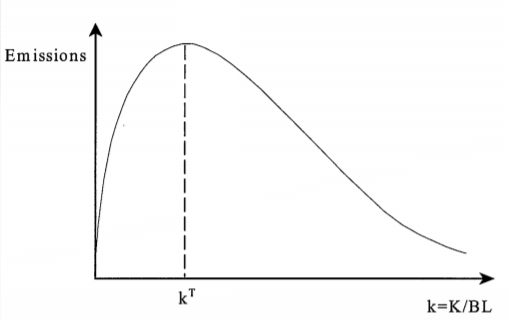

In [76]:
from IPython.display import Image
Image(filename='Kuznetz_Curve.png')